# TIME SERIES ANALYSIS

- A time-series data is a series of data points or observations recorded at different or regular time intervals. 
- In general, a time series is a sequence of data points taken at equally spaced time intervals.
- The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

### Time Series Forecasting:
The process of using a statistical model to predict future values of a time-series based on past results.

Importing All Neccessary Libraries<br>
**Pandas**: Pandas allows us to analyze big data and make conclusions based on statistical theories. Pandas can clean messy data sets, and make them readable and relevant.<br>
**Numpy**:NumPy is a powerful library in Python for numerical computing. It provides a wide range of mathematical functions and operations that are optimized for efficiency.<br>
**Matplot Library** : Matplotlib is a python library used to create 2D graphs and plots by using python scripts and for visulalization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the data

In [2]:
df=pd.read_csv("D:\intern\loan\CO2.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['Year', 'CO2'], dtype='object')

In [5]:
df.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


In [6]:
df.shape

(999, 2)

In [7]:
df.columns

Index(['Year', 'CO2'], dtype='object')

In [8]:
df.isnull().sum()

Year    784
CO2     784
dtype: int64

In [9]:
data = df.dropna()

print(data.to_string())

       Year       CO2
0    1800.0   0.00568
1    1801.0   0.00561
2    1802.0   0.00555
3    1803.0   0.00548
4    1804.0   0.00542
5    1805.0   0.00536
6    1806.0   0.00529
7    1807.0   0.00523
8    1808.0   0.00517
9    1809.0   0.00511
10   1810.0   0.00504
11   1811.0   0.00497
12   1812.0   0.00490
13   1813.0   0.00483
14   1814.0   0.00475
15   1815.0   0.00466
16   1816.0   0.00457
17   1817.0   0.00447
18   1818.0   0.00438
19   1819.0   0.00427
20   1820.0   0.00417
21   1821.0   0.00406
22   1822.0   0.00395
23   1823.0   0.00384
24   1824.0   0.00373
25   1825.0   0.00362
26   1826.0   0.00350
27   1827.0   0.00339
28   1828.0   0.00327
29   1829.0   0.00316
30   1830.0   0.00305
31   1831.0   0.00294
32   1832.0   0.00283
33   1833.0   0.00273
34   1834.0   0.00263
35   1835.0   0.00253
36   1836.0   0.00244
37   1837.0   0.00235
38   1838.0   0.00227
39   1839.0   0.00218
40   1840.0   0.00210
41   1841.0   0.00202
42   1842.0   0.00195
43   1843.0   0.00188
44   1844.

In [10]:
data.tail()

,Year,CO2
210,2010.0,15.6
211,2011.0,15.6
212,2012.0,14.8
213,2013.0,14.7
214,2014.0,15.1


In [11]:
data.shape

(215, 2)

In [12]:
data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [13]:
data.columns


Index(['Year', 'CO2'], dtype='object')

# Visualize the Data

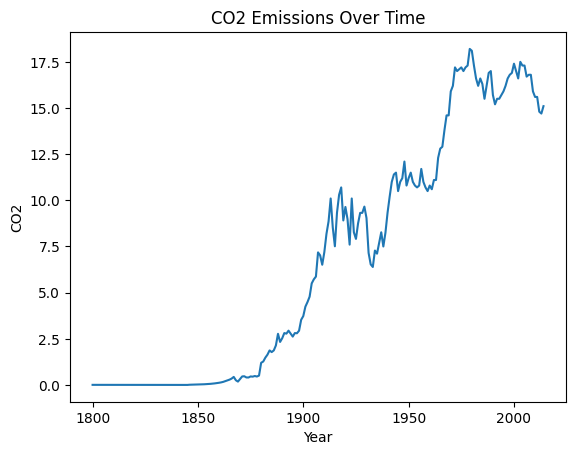

In [14]:
#Plot the line graph
plt.plot(df['Year'], df['CO2'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('CO2 Emissions Over Time')

# Show the plot
plt.show()

- Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

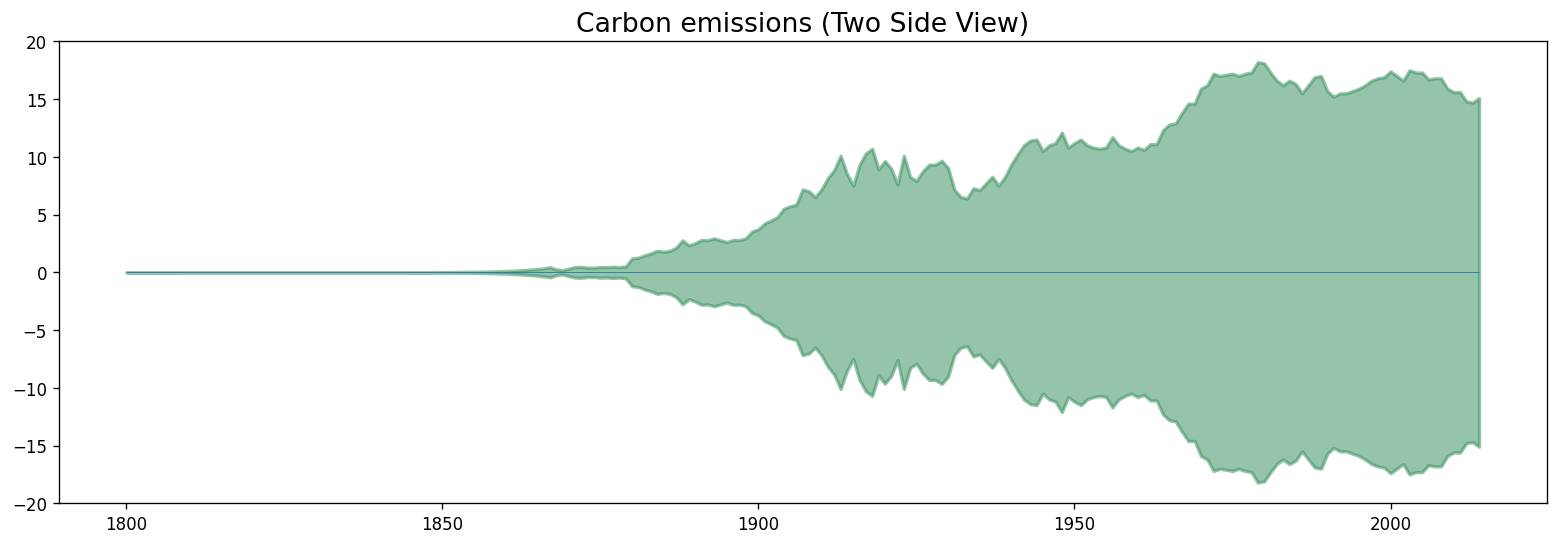

In [15]:
x = df['Year'].values
y1 = df['CO2'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-20, 20)
plt.title('Carbon emissions (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Year']), xmax=np.max(df['Year']), linewidth=.5)
plt.show()

- The given data is yearly, and from the plot, the value of carbon emissions is increasing with a repetitive form.

In [16]:
print(df.describe())

              Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000


In [17]:
from scipy.stats import ttest_ind

group1 = df[df['Year'] < 1900]['CO2']
group2 = df[df['Year'] >= 1900]['CO2']

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print('There is a significant difference between CO2 emissions before and after 1900.')
else:
    print('There is no significant difference between CO2 emissions before and after 1900.')

There is a significant difference between CO2 emissions before and after 1900.


In [18]:
import statsmodels.api as sm

In [19]:
data = pd.read_csv('D:\intern\loan\CO2.csv', index_col='Year', parse_dates=True)

In [20]:
data=data.dropna()

In [21]:
data.isnull().sum()

CO2    0
dtype: int64

In [22]:
data

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


# Time Series Clustering: 

Apply clustering algorithms to group similar time series patterns based on CO2 levels and year. This can help identify distinct patterns or clusters of CO2 behavior over time.

## K-Means Clustering
 k-means clustering can be a useful tool for exploring patterns and grouping similar time series data



In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = data[['CO2']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

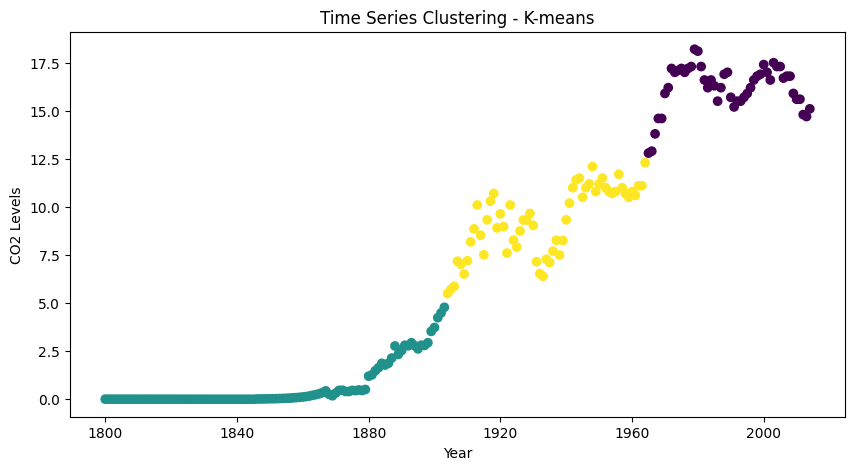

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(10,5))
plt.scatter(data.index, X, c=labels, cmap='viridis')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.title('Time Series Clustering - K-means')
plt.show()

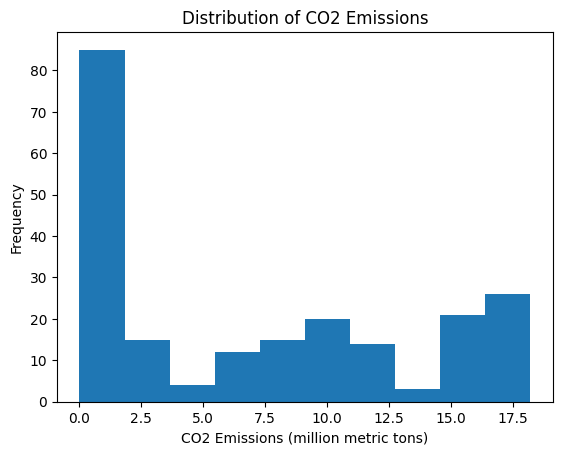

In [25]:
plt.hist(df['CO2'], bins=10)
plt.xlabel('CO2 Emissions (million metric tons)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()


##  Patterns in a Time Series 
- Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.

- **Level:** The average value in the series.
- **Trend:** The increasing or decreasing value in the series.
- **Seasonality:** The repeating short-term cycle in the series.
- **Noise(Error):**  The random variation in the series.

<AxesSubplot: xlabel='Year'>

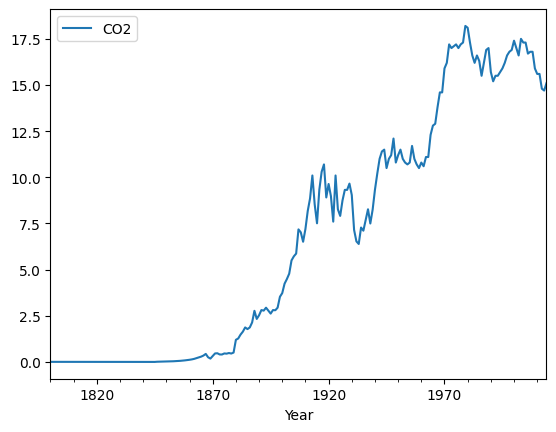

In [26]:
data.plot()

<AxesSubplot: xlabel='Year'>

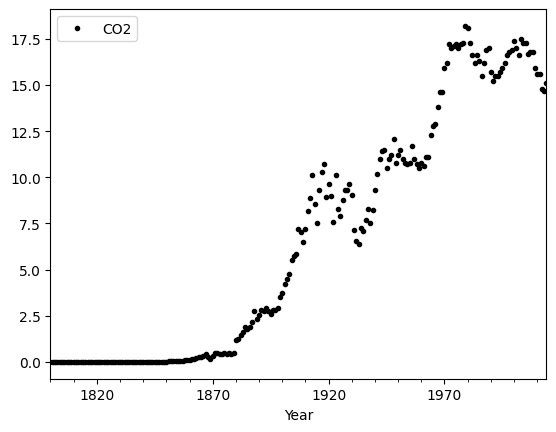

In [27]:
data.plot(style='k.')

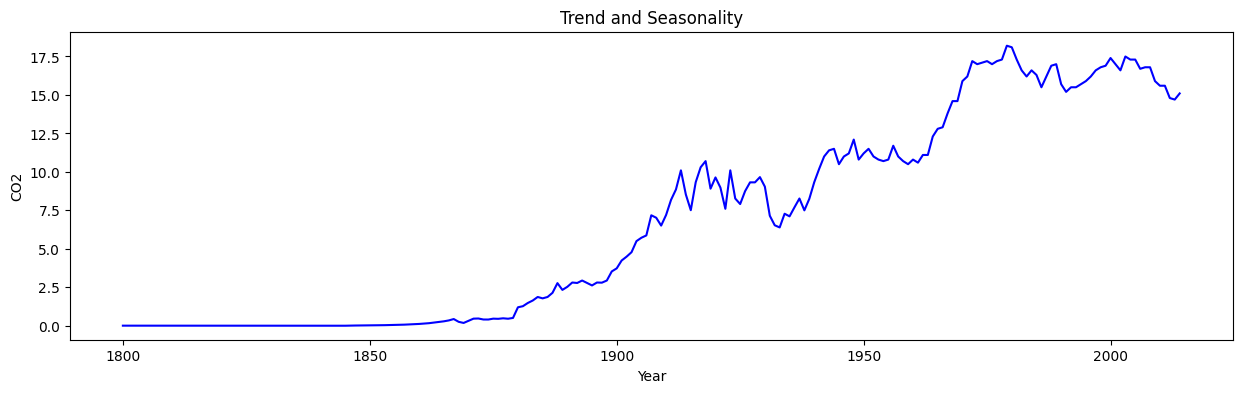

In [28]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='CO2', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Year'], y=df['CO2'], title='Trend and Seasonality')

**Cyclic behaviour**
- Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

- If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors

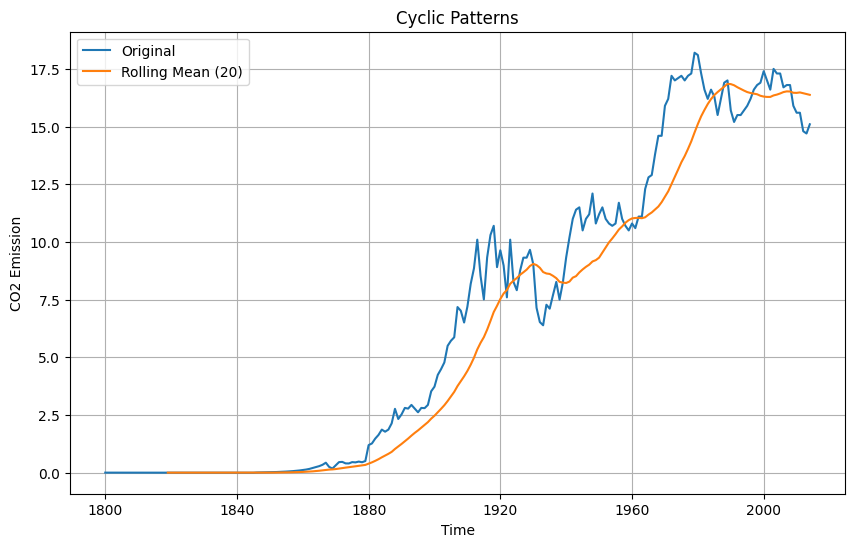

In [29]:
window_size = 20 
rolling_mean = data['CO2'].rolling(window_size).mean()

# Plot the original data and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(data['CO2'], label='Original')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size})')
plt.xlabel('Time')
plt.ylabel('CO2 Emission')
plt.title('Cyclic Patterns')
plt.legend()
plt.grid(True)
plt.show()

The rolling mean can also provide insights into the cyclic behavior of the data. It can help identify recurring patterns or oscillations that occur over a specific period. By comparing the values of the rolling mean at different points in time, you can observe how the data fluctuates around the mean and detect cyclic patterns.

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## Additive and Multiplicative Time Series 
- We may have different combinations of trends and seasonality.
- Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. 
- Each observation in the series can be expressed as either a sum or a product of the components.


- **Additive time series:**
Value = Base Level + Trend + Seasonality + Error

- **Multiplicative Time Series:**
Value = Base Level x Trend x Seasonality x Error

 #  Decomposition of a Time Series
 
- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
- The seasonal_decompose in statsmodels implements this conveniently.

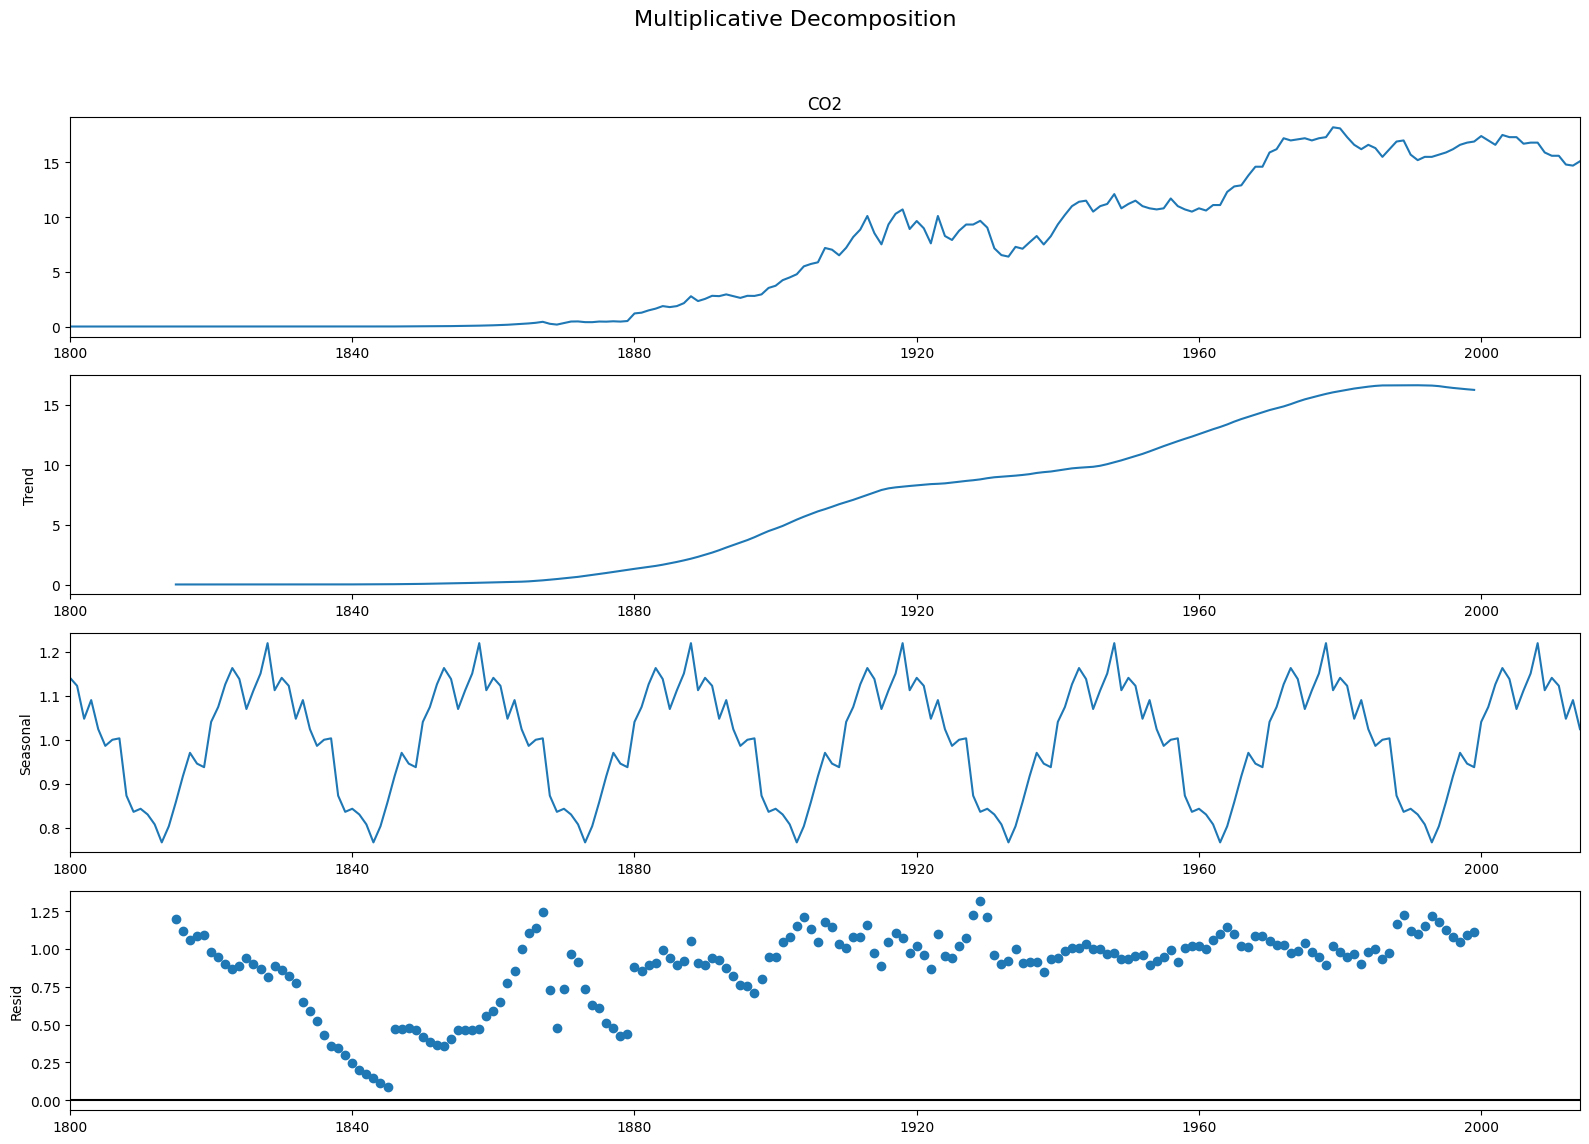

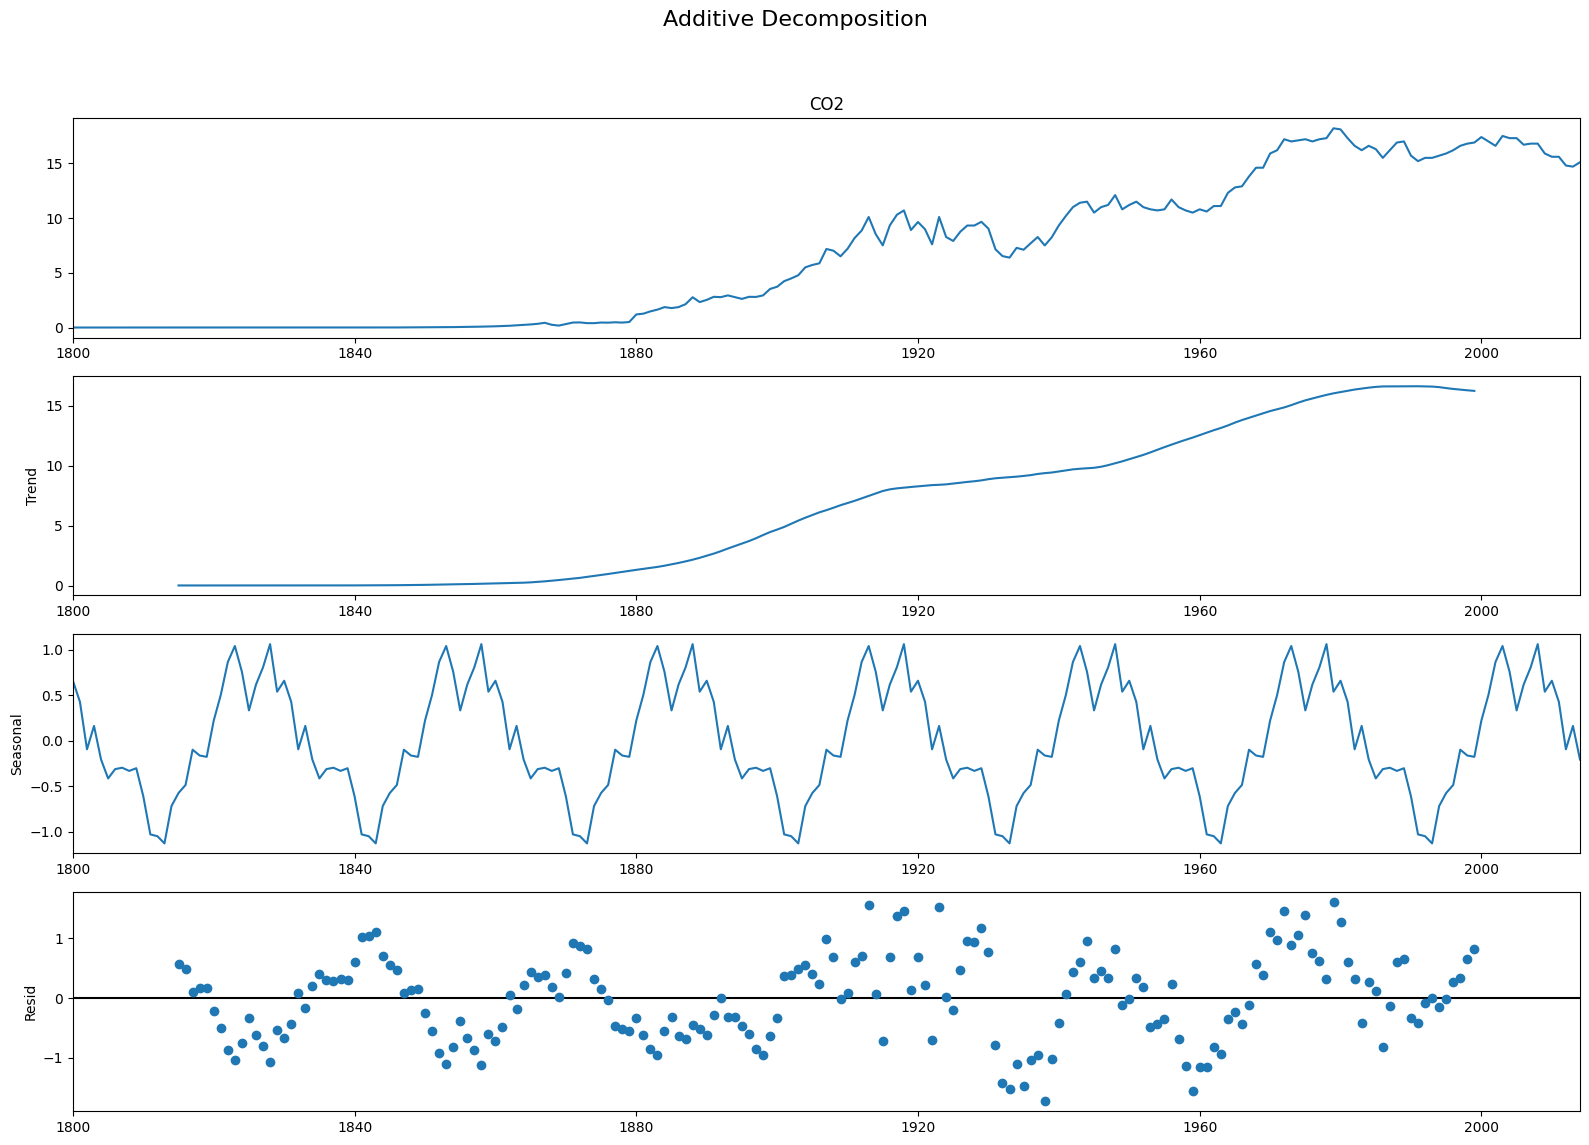

In [31]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['CO2'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['CO2'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'CO2 detrended by subtracting the least squares fit')

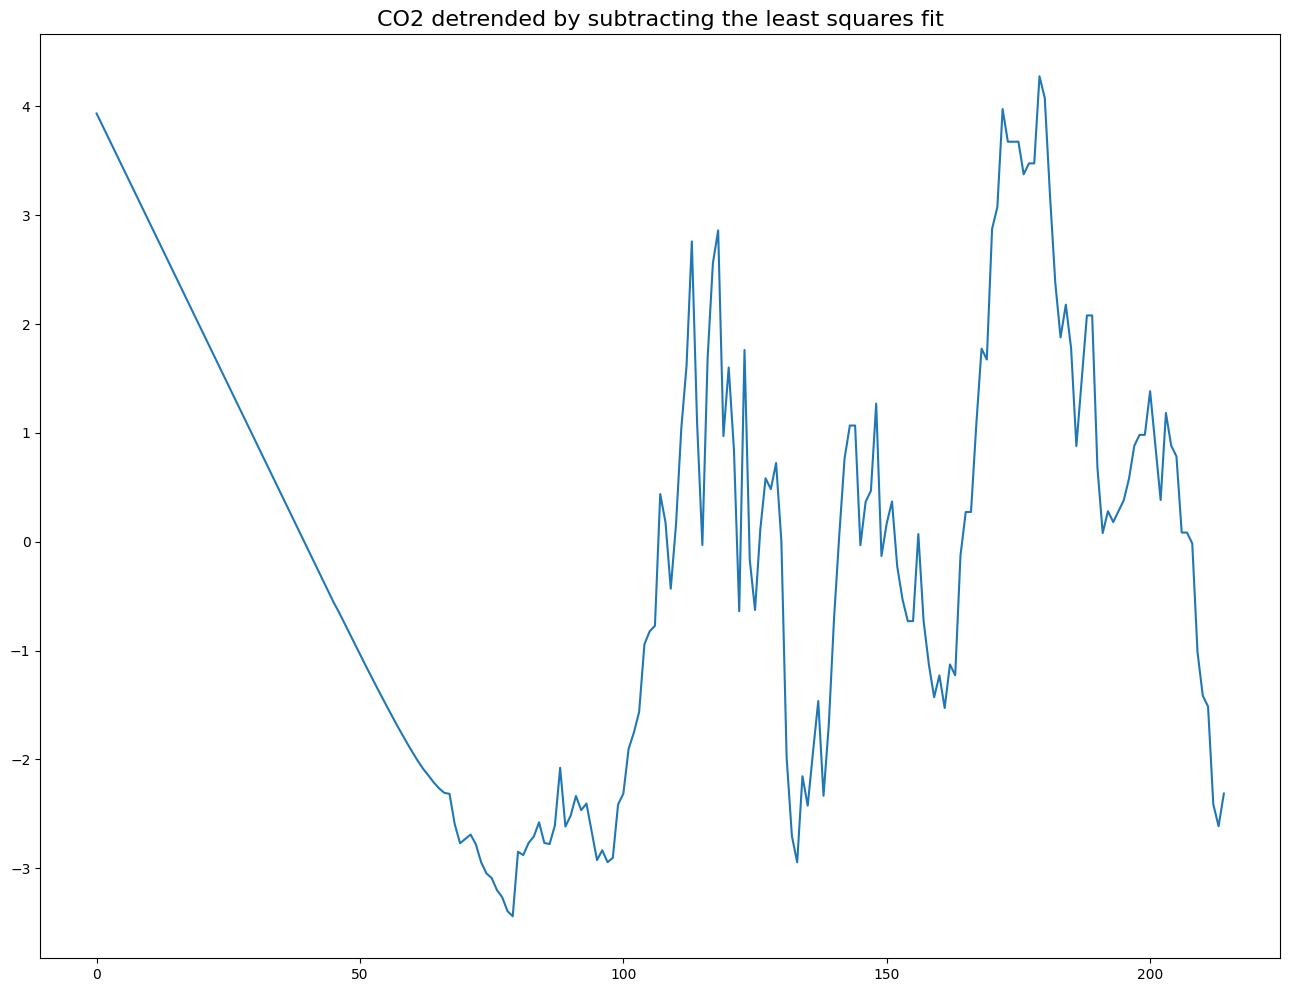

In [32]:
from scipy import signal
detrended = signal.detrend(data['CO2'].values)
plt.plot(detrended)
plt.title('CO2 detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'CO2 detrended by subtracting the trend component')

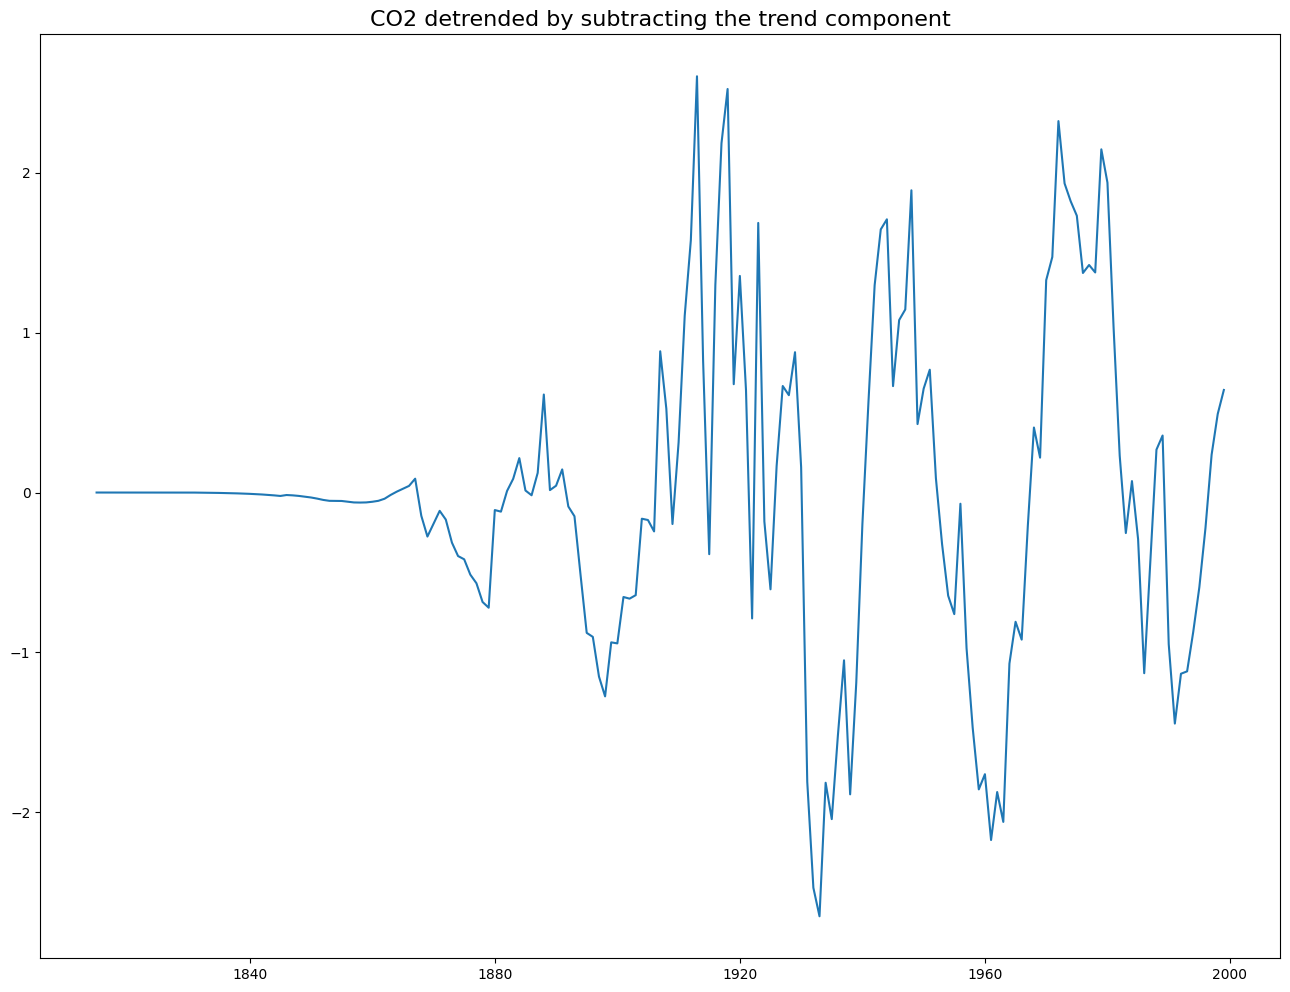

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(data['CO2'], model='multiplicative', period=30)
detrended = data['CO2'].values - result_mul.trend
plt.plot(detrended)
plt.title('CO2 detrended by subtracting the trend component', fontsize=16)


[]

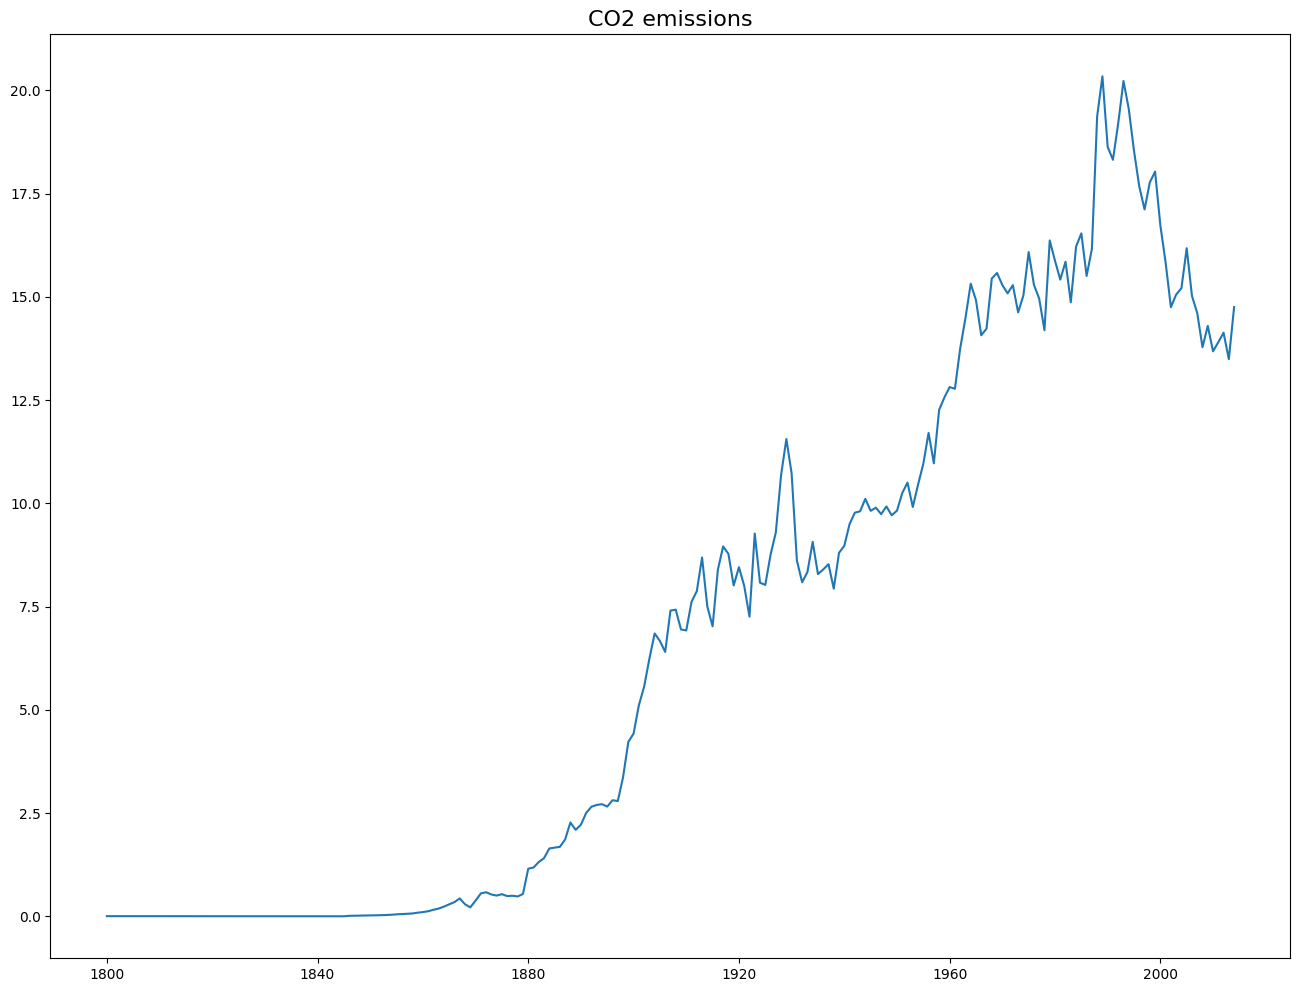

In [34]:
# Time Series Decomposition
result_mul = seasonal_decompose(data['CO2'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = data['CO2'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('CO2 emissions', fontsize=16)
plt.plot()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

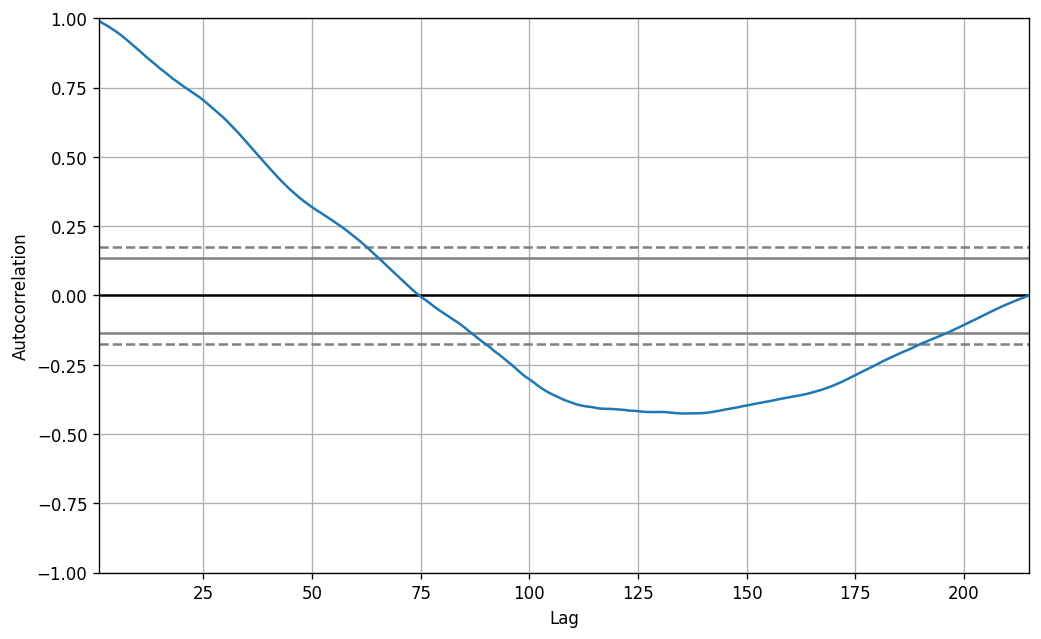

In [35]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data['CO2'].tolist())

- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


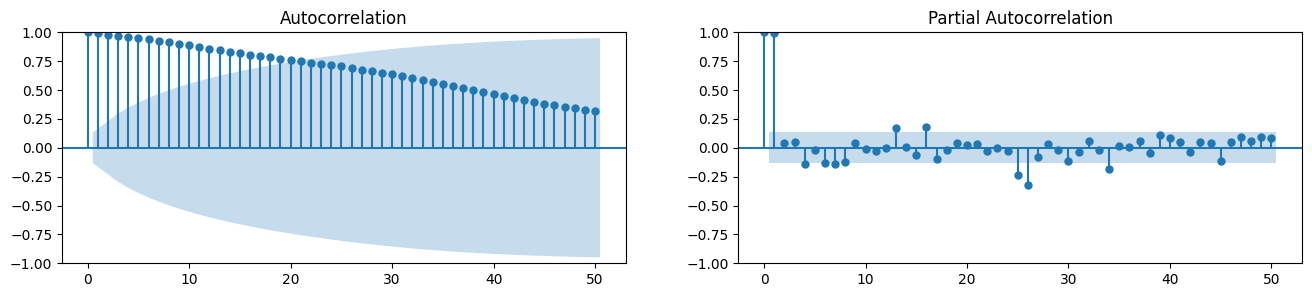

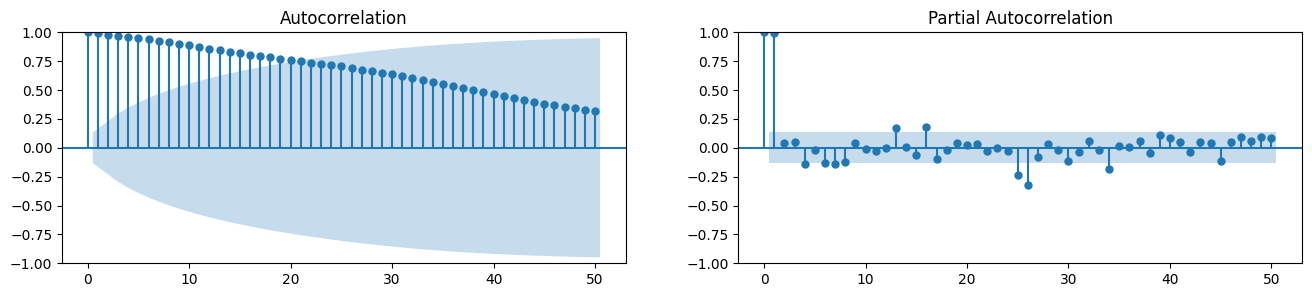

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['CO2'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['CO2'].tolist(), lags=50, ax=axes[1])


A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

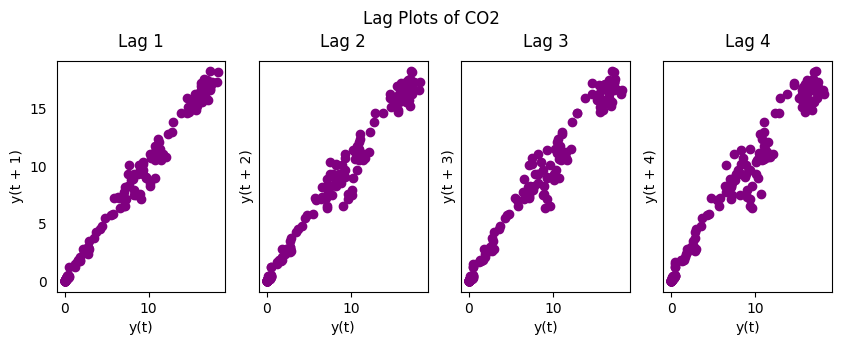

In [37]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data['CO2'], lag=i+1, ax=ax, c='purple')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of CO2', y=1.05)    
plt.show()

In [38]:
data.columns

Index(['CO2'], dtype='object')

**Augmented Dickey Fuller test or (ADF Test)** is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

In [39]:

result = sm.tsa.stattools.adfuller(data['CO2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.378463
p-value: 0.913633
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


Since p-value(0.91) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

In [40]:
co2 = data['CO2']

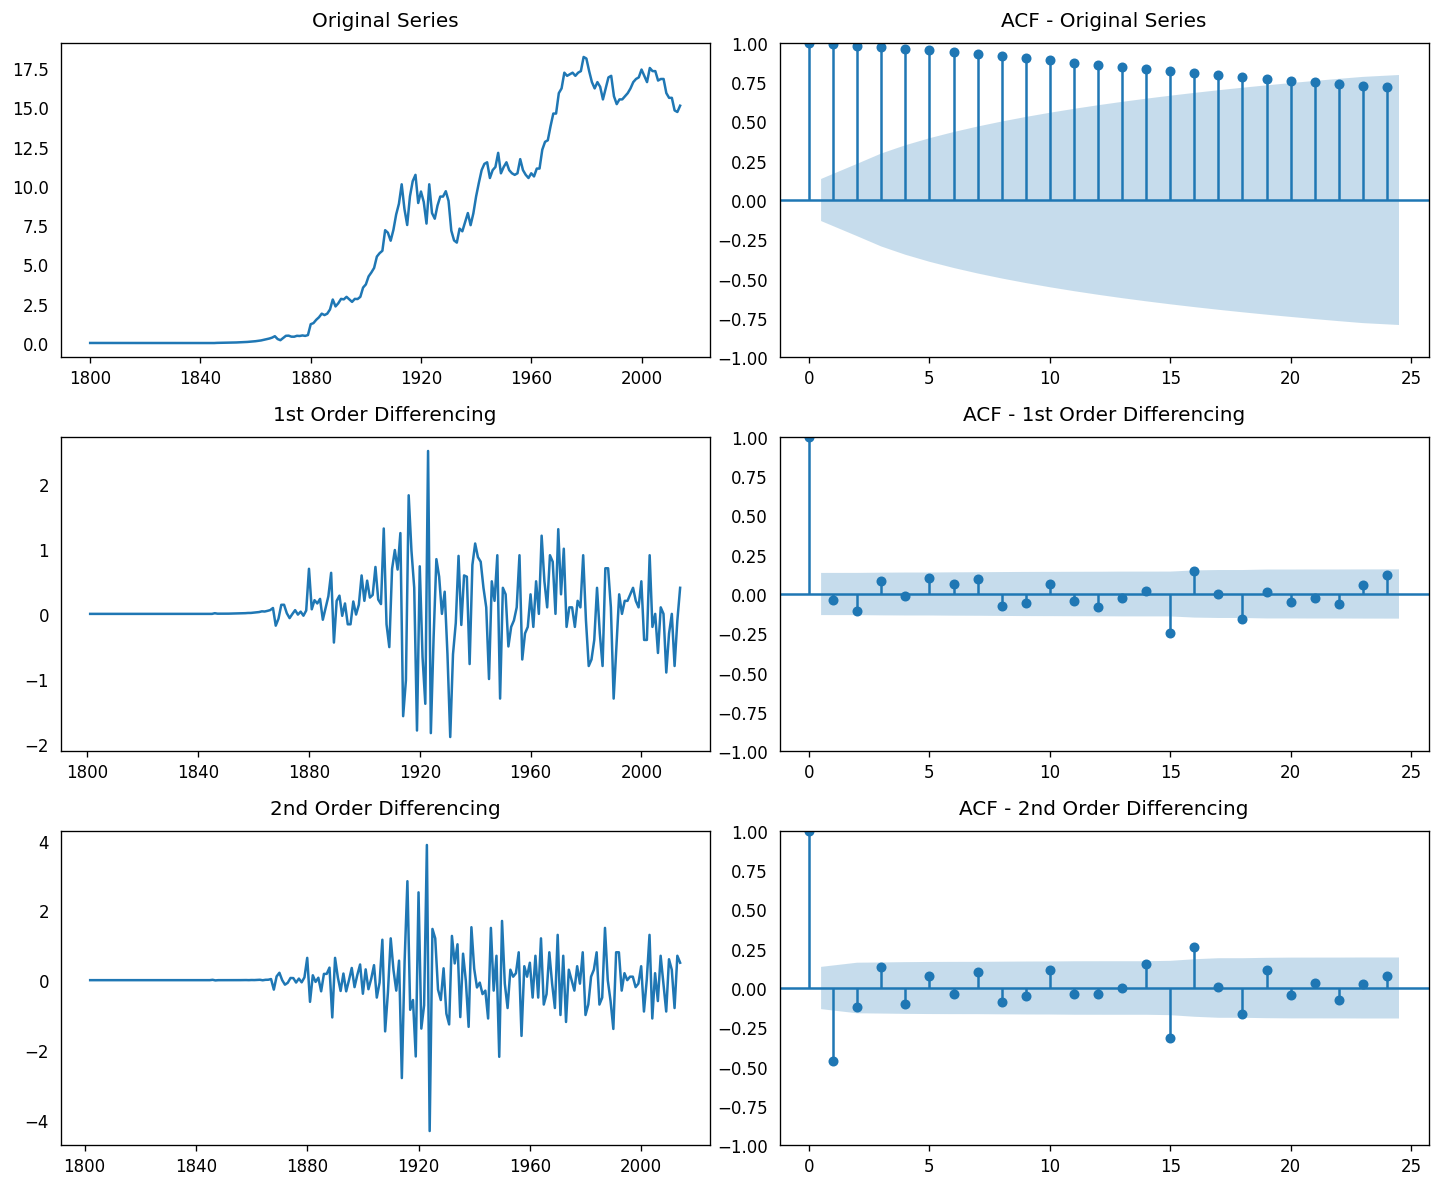

In [41]:
#Create subplots for the series and ACF
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Plot the original series
axes[0, 0].plot(co2)
axes[0, 0].set_title('Original Series')

# Plot the ACF for the original series
plot_acf(co2, ax=axes[0, 1])
axes[0, 1].set_title('ACF - Original Series')

# First differencing
co2_diff1 = co2.diff().dropna()

# Plot the first differencing
axes[1, 0].plot(co2_diff1)
axes[1, 0].set_title('1st Order Differencing')

# Plot the ACF for the first differencing
plot_acf(co2_diff1, ax=axes[1, 1])
axes[1, 1].set_title('ACF - 1st Order Differencing')

# Second differencing
co2_diff2 = co2_diff1.diff().dropna()

# Plot the second differencing
axes[2, 0].plot(co2_diff2)
axes[2, 0].set_title('2nd Order Differencing')

# Plot the ACF for the second differencing
plot_acf(co2_diff2, ax=axes[2, 1])
axes[2, 1].set_title('ACF - 2nd Order Differencing')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


# Non-Stationary to Stationary

**Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.<br>
Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.

**We can apply some sort of transformation to make the time-series stationary. These transformation may include:**
- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above
The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

In [42]:
data1 = data.copy()
data1['CO2_diff'] = data['CO2'].diff()
data1 = data1.dropna(subset=['CO2_diff'])


In [43]:
 data1

,CO2,CO2_diff
Year,,
1801-01-01,0.00561,-0.00007
1802-01-01,0.00555,-0.00006
1803-01-01,0.00548,-0.00007
1804-01-01,0.00542,-0.00006
1805-01-01,0.00536,-0.00006
...,...,...
2010-01-01,15.60000,-0.30000
2011-01-01,15.60000,0.00000
2012-01-01,14.80000,-0.80000


**Introduction to Differencing**
Table of Contents

- If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1.
- In simpler terms, differencing the series is nothing but subtracting the next value by the current value.
- If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.
- For example, consider the following series: [1, 5, 2, 12, 20]
- First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

In [44]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(data1['CO2_diff'])

# Extract the p-value from the test result
p_value = result[1]

print("P-value:", p_value)

P-value: 0.00311864959424207


**since p-value(0.003) is less than the significance level(0.05)the data1 is stationary**

In [45]:
# Split the data into training and test sets
train_data = data['CO2']
test_data = data['CO2']


# Building Models on Non-Stationary Data

## ARIMA MODEL

ARIMA stands for Autoregressive Integrated Moving Average. It is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components.

The AR component captures the linear relationship between the current observation and a certain number of lagged observations. The MA component represents the dependency between the current observation and a linear combination of past forecast errors. The I component represents differencing to make the time series stationary, which involves subtracting the previous observation from the current observation.

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

### Finding the best order for ARIMA Model

The ARIMA model is defined by three parameters: p, d, and q.

- p represents the order of the autoregressive component, which captures the linear relationship between the current observation and the previous observations.
- d represents the order of differencing, which determines the number of times the time series needs to be differenced to achieve stationarity.
- q represents the order of the moving average component, which captures the dependency between the current observation and the past forecast errors.

In [47]:
import statsmodels.api as sm
data.index = pd.DatetimeIndex(data.index, freq='AS-JAN')
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# Create a list to store AIC values for each parameter combination
aic_values = []

# Iterate over all combinations of p, d, and q
for param in [(x, y, z) for x in p for y in d for z in q]:
    try:
        # Fit the ARIMA model for the current parameter combination
        model = sm.tsa.ARIMA(data['CO2'], order=param)
        results = model.fit()
        
        # Get the AIC value for the current model
        aic = results.aic
        
        # Store the AIC value in the list
        aic_values.append((param, aic))
        
    except:
        continue
         
# Find the best order with the minimum AIC value
best_order, best_aic = min(aic_values, key=lambda x: x[1])

# Print the best ARIMA order and its AIC value
print("Best ARIMA Order:", best_order)
print("Best AIC Value:", best_aic)


C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA Order: (2, 1, 2)
Best AIC Value: 350.723897520273


C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Fitting Arima model

In [48]:
# Fit the ARIMA model
#model = ARIMA(data['CO2'], order=(0,1,0))
model = ARIMA(train_data, order=(2,1,2))
model_fit = model.fit()


C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


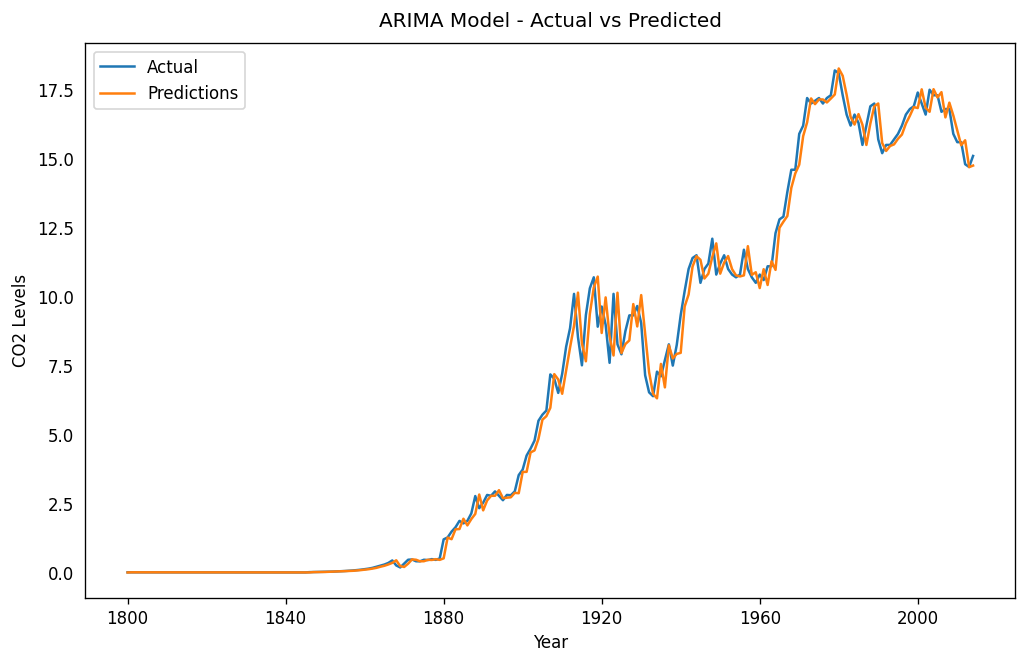

In [49]:

# Get the predictions for the entire dataset
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
actual_values = data['CO2']
# Plot the actual data and predictions
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predictions')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


In [50]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(actual_values, predictions)
# Calculate the R-squared score
mse=mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

In [51]:
print("Mean Absolute Error", mae)
print("root Mean Squared Error", rmse)
print("Mean Squared Error",mse)
print("R2 Score",r2)

Mean Absolute Error 0.3264835542090861
root Mean Squared Error 0.5330560974011317
Mean Squared Error 0.2841488029765248
R2 Score 0.9932895638096153


In [52]:
# Fit the ARIMA model with the best order
model_fit = model.fit()
# Get the forecasted values
forecast = model_fit.get_forecast(steps=50)
# Extract the predicted mean values
predictions = forecast.predicted_mean
#print("Forecasted Values:", predictions)


C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -170.362
Date:                Sat, 17 Jun 2023   AIC                            350.724
Time:                        22:21:55   BIC                            367.554
Sample:                    01-01-1800   HQIC                           357.525
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8056      0.033    -54.809      0.000      -1.870      -1.741
ar.L2         -0.9015      0.033    -27.644      0.000      -0.965      -0.838
ma.L1          1.9198      0.255      7.539      0.0

## SARIMA MODEL

- The plain ARIMA model has a problem. It does not support seasonality.
- If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.
- Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.
- So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
import pandas as pd
from pmdarima.arima import auto_arima


# Find the optimal order for SARIMAX
model = auto_arima(test_data, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',  # to ignore warnings
                   suppress_warnings=True,  # to ignore convergence warnings
                   stepwise=True)

# Print the optimal order
print("Optimal Order:", model.order)
print("Optimal Seasonal Order:", model.seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=494.437, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=415.779, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=496.437, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=393.823, Time=0.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=393.288, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=414.834, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=393.700, Time=0.41 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=395.638, Time=0.48 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=395.263, Time=

In [102]:
model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(2, 1, 0, 12))
sar_model_fit = model.fit()

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [103]:
sar_predictions = sar_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

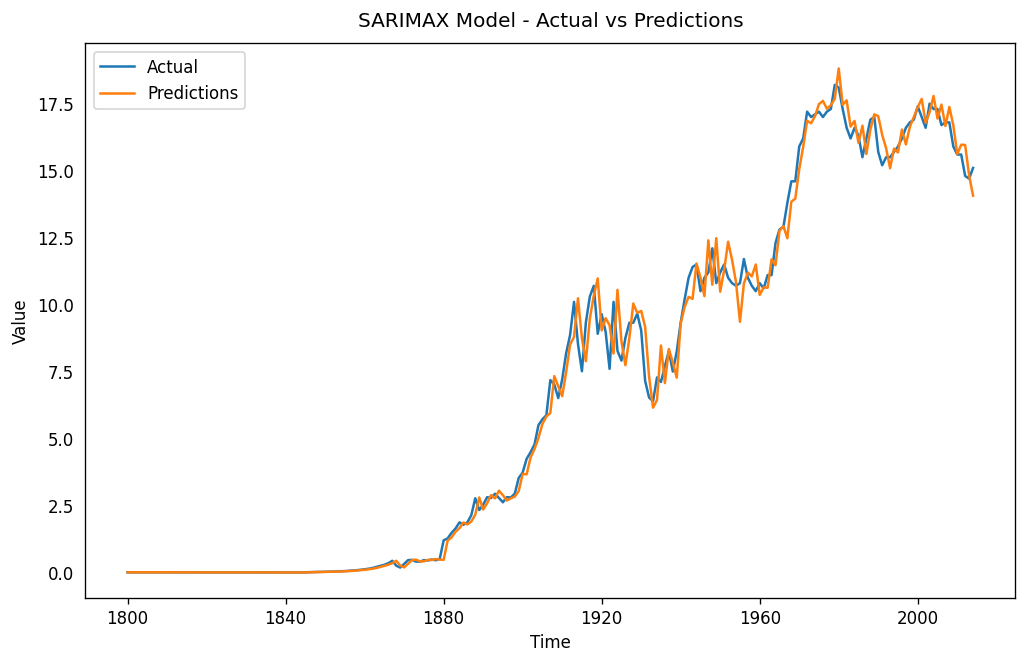

In [104]:
plt.plot(actual_values, label='Actual')
plt.plot(sar_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMAX Model - Actual vs Predictions')
plt.legend()
plt.show()


In [105]:
# Calculate the mean absolute error
mae = mean_absolute_error(actual_values, sar_predictions)
# Calculate the R-squared score
r2 = r2_score(actual_values, sar_predictions)
msse=mean_squared_error(actual_values, sar_predictions)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(actual_values, sar_predictions))

In [106]:
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 Score",r2)

Mean Absolute Error 0.36610433452855257
Mean Squared Error 0.294411409090652
Root Mean Squared Error 0.6000724182397073
R2 Score 0.9914962154054817


In [107]:
print(sar_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  215
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -193.644
Date:                            Sat, 17 Jun 2023   AIC                            393.288
Time:                                    22:23:28   BIC                            403.212
Sample:                                01-01-1800   HQIC                           397.303
                                     - 01-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7757      0.043    -18.176      0.000      -0.859      -0.692
ar.S.L24      -0.3308      0.049   

## Exponential Smoothing

- Exponential smoothing is a time series forecasting method for univariate data.

- Time series methods like the Box-Jenkins ARIMA family of methods develop a model where the prediction is a weighted linear sum of recent past observations or lags.

- Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.

- Specifically, past observations are weighted with a geometrically decreasing ratio.

In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [109]:
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12,damped_trend=True)
ex_model_fit = model.fit()

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [110]:
ex_predictions = ex_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])


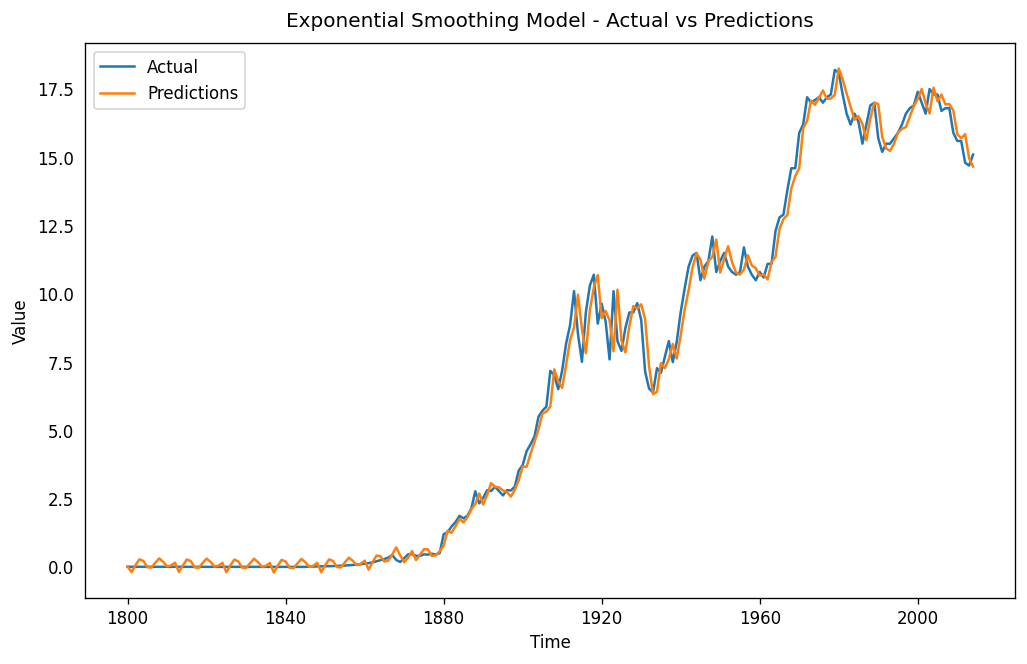

In [111]:
plt.plot(actual_values, label='Actual')
plt.plot(ex_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing Model - Actual vs Predictions')
plt.legend()
plt.show()

In [112]:
# Calculate the mean absolute error
mae = mean_absolute_error(actual_values, ex_predictions)
# Calculate the R-squared score
r2 = r2_score(actual_values, ex_predictions)
# Calculate the root mean squared error
mse=mean_squared_error(actual_values, ex_predictions)
rmse = np.sqrt(mean_squared_error(actual_values, ex_predictions))

In [113]:
print("Mean Absolute Error", mae)
print("Root Mean Squared Error", rmse)
print("mean Squared Error",mse)
print("R2 Score",r2)

Mean Absolute Error 0.35754639302343866
Root Mean Squared Error 0.5296376870776311
mean Squared Error 0.2805160795729428
R2 Score 0.9933753539250115


## CURVE FIT [Gompertz curve]

- The Gompertz curve is described by the following equation:
- y(t) = a * exp(-b * exp(-c * t))
   In this equation, y(t) represents the value of the time series at time t.
- The parameters a, b, and c control the shape and characteristics of the curve.
- Fitting a Gompertz curve to a time series involves estimating the optimal values for the parameters a, b, and c.
- This can be done using optimization techniques, such as nonlinear least squares or maximum likelihood estimation.
- The goal is to find the parameter values that minimize the difference between the observed data and the predicted values from the Gompertz curve.


In [68]:
from scipy.optimize import curve_fit

In [69]:
x_data= data.index.year
y_data = data['CO2']


In [70]:
# Define the curve function to fit

def curve_func(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))


In [71]:
params, _ = curve_fit(curve_func, x_data, y_data,p0=[1, 1, 1])


C:\Users\Naveen\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [72]:
# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate fitted curve
y_data_fit = curve_func(x_data, a_fit, b_fit, c_fit)


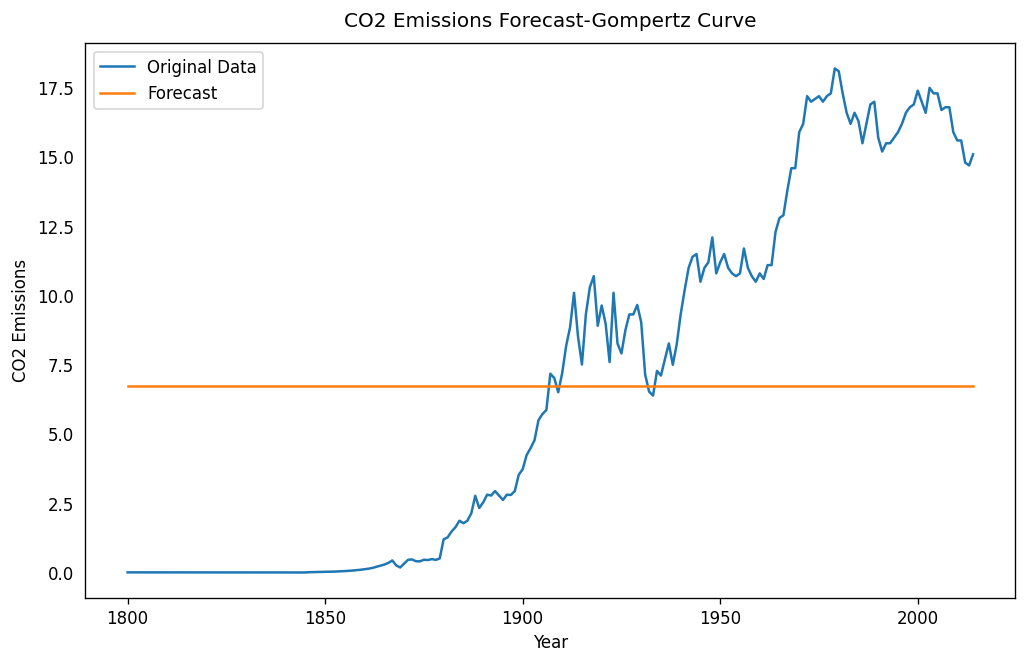

In [73]:
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_data_fit, label='Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast-Gompertz Curve')
plt.legend()
plt.show()

In [74]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_data,y_data_fit)
# Calculate the R-squared score
r2 = r2_score(y_data,y_data_fit)
mse=mean_squared_error(y_data, y_data_fit)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_data, y_data_fit))

In [75]:
print("Mean Absolute Error", mae)
print("Root Mean Squared Error", rmse)
print("Mean Squared Error", mse)
print("R2 Score",r2)

Mean Absolute Error 5.892029120606024
Root Mean Squared Error 6.507250716848661
Mean Squared Error 42.34431189192741
R2 Score -2.220446049250313e-16


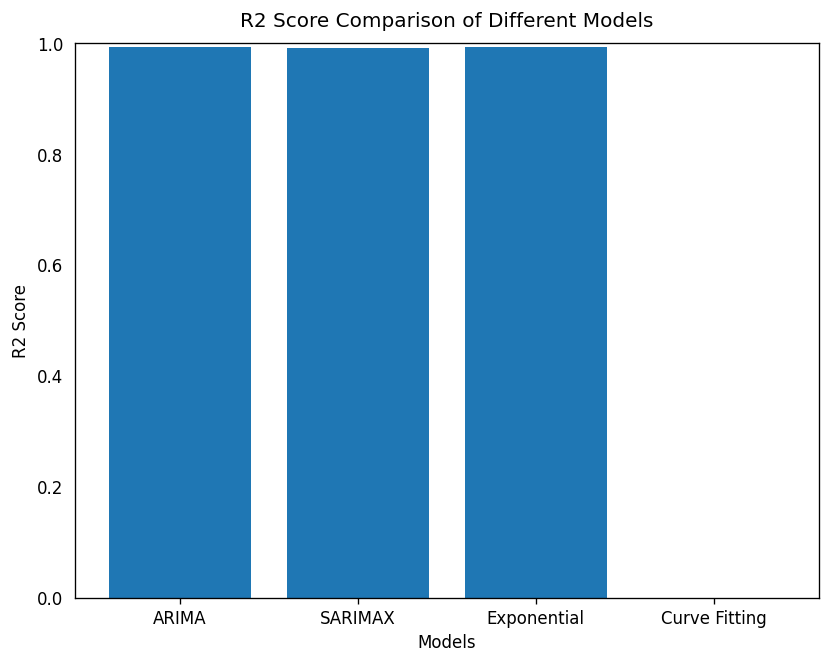

In [76]:
import matplotlib.pyplot as plt

# Define the R-squared scores for each model
arima_r2 = 0.9932895638096153  # Example value
sarimax_r2 = 0.9914962154054817  # Example value
exponential_r2 = 0.9934058584977753  # Example value
curve_r2 = -2.220446049250313e-16  # Example value

# Create a list of models and corresponding R-squared scores
models = ['ARIMA', 'SARIMAX', 'Exponential', 'Curve Fitting']
r2_scores = [arima_r2, sarimax_r2, exponential_r2, curve_r2]

# Plot the R-squared scores
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()


# Building Models On Stationary Data
## ARIMA MODEL

In [77]:
y_data = data1['CO2_diff']


## Best Order For ARIMA Model

In [78]:

# Define the range of values to search for p, d, and q parameters
p_values = range(0, 3)  # Autoregressive (AR) parameter
d_values = range(0, 2)  # Integrated (I) parameter
q_values = range(0, 3)  # Moving average (MA) parameter

# Initialize variables for best order and best MSE
best_order = None
best_mse = float('inf')

# Perform grid search to find the best order
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            
            try:
                # Train ARIMA model with current order
                model = ARIMA(y_data, order=order,freq='AS-JAN')
                model_fit = model.fit()

                # Make predictions
                y_pred = model_fit.predict()

                # Calculate mean squared error (MSE)
                mse = mean_squared_error(y_data, y_pred)

                # Check if current order is better than previous best
                if mse < best_mse:
                    best_order = order
                    best_mse = mse

            except:
                continue

# Print the best order and its corresponding MSE
print("Best Order:", best_order)
print("Best MSE:", best_mse)

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Best Order: (2, 0, 2)
Best MSE: 0.2921980384140416


In [114]:
ar_model = ARIMA(y_data, order=(2,0,2))
ar_model_fit = ar_model.fit()

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


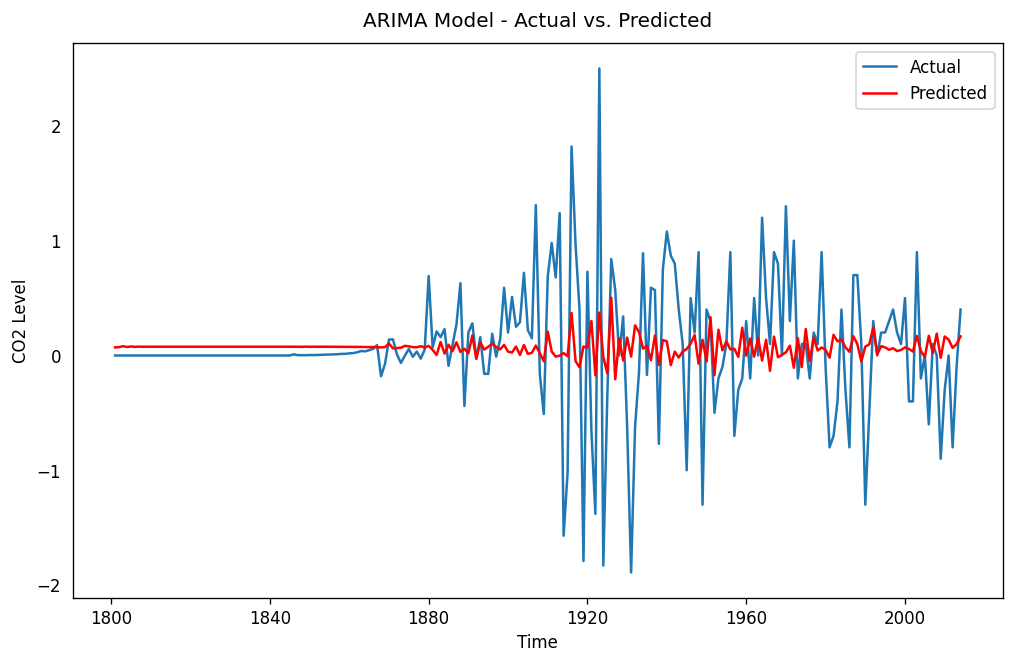

In [115]:
#Make preardictions on the entire dataset
y_pred = ar_model_fit.predict(start=y_data.index[0], end=y_data.index[-1])

# Plot actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_data.index, y_data, label='Actual')
plt.plot(y_data.index, y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('CO2 Level')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.legend()
plt.show()


In [116]:
# Calculate evaluation metrics
ar_mae = mean_absolute_error(y_data, y_pred)
ar_mse = mean_squared_error(y_data, y_pred)
ar_rmse = mean_squared_error(y_data, y_pred, squared=False)
ar_r2 = r2_score(y_data, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", ar_mae)
print("Mean Squared Error (MSE):", ar_mse)
print("Root Mean Squared Error (RMSE):", ar_rmse)
print("R-squared (R2) Score:", ar_r2)

Mean Absolute Error (MAE): 0.3489391373463
Mean Squared Error (MSE): 0.2921980384140416
Root Mean Squared Error (RMSE): 0.5405534556489687
R-squared (R2) Score: 0.02535690122961476


In [117]:
#Forecast future values
forecasted_values = ar_model_fit.predict(start=len(y_data), end=len(y_data) + 49)



# Add the differenced values back to obtain the actual predicted values
predicted_values = forecasted_values.cumsum() + data1['CO2'].iloc[-1]
#predicted_values = np.cumsum(forecasted_values) + y_data.iloc[-1]

# Print the predicted values for the next 50 time points
#print(predicted_values)

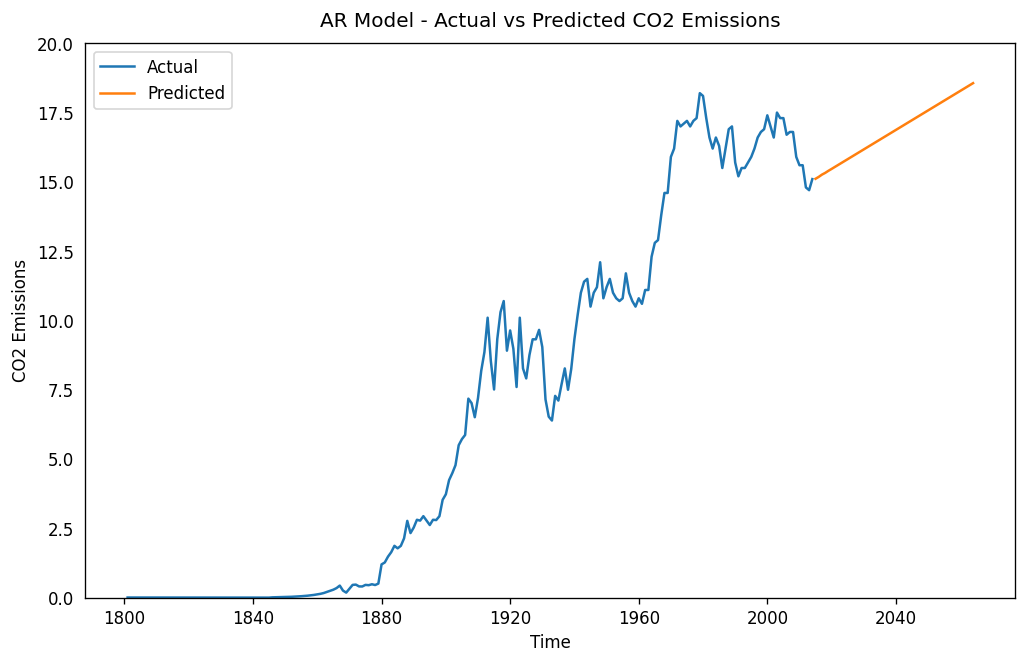

In [118]:

# Plot the actual values and the predicted values
plt.plot(data1.index, data1['CO2'], label='Actual')
plt.plot(predicted_values.index, predicted_values.values, label='Predicted')
plt.xlabel('Time')

plt.ylabel('CO2 Emissions')
plt.title('AR Model - Actual vs Predicted CO2 Emissions')
plt.legend()
plt.ylim(0,20)
plt.show()


## SARIMA MODEL

### Finding the Best Order

In [84]:
# Find the optimal order for SARIMAX
model = auto_arima(y_data, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',  # to ignore warnings
                   suppress_warnings=True,  # to ignore convergence warnings
                   stepwise=True)

# Print the optimal order
print("Optimal Order:", model.order)
print("Optimal Seasonal Order:", model.seasonal_order)




Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=631.622, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=511.654, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=593.360, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=485.886, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=545.546, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=451.222, Time=0.56 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=467.896, Time=0.17 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.13 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=441.369, Time=0.46 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=461.485, Time=

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


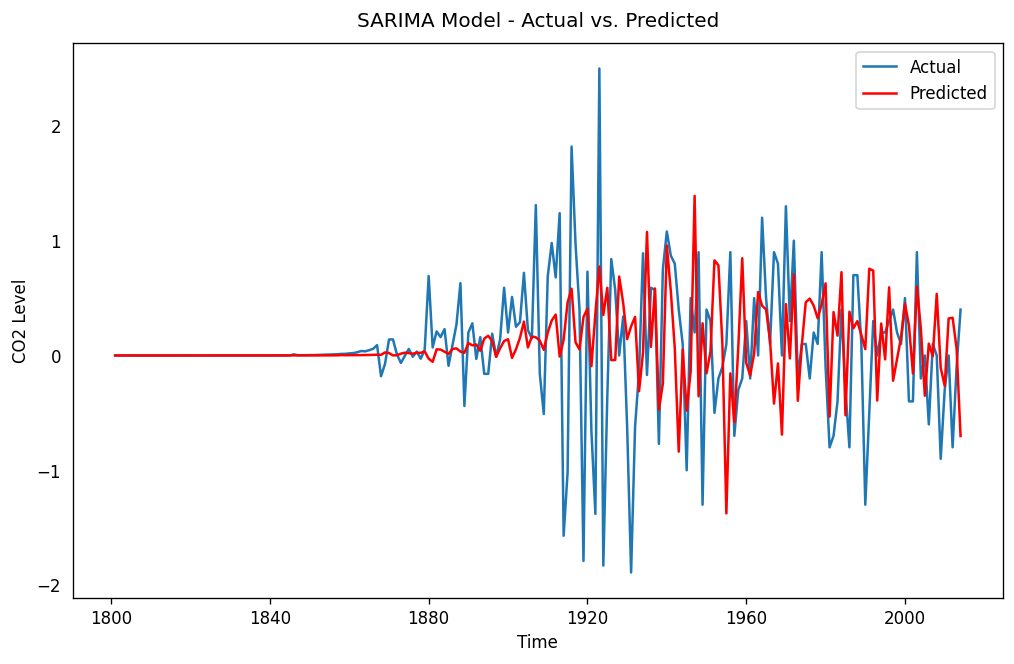

In [119]:

# Train the SARIMA model with the best order
model = SARIMAX(y_data, order=(0,1,2), seasonal_order=(2,1,0,12))
model_fit = model.fit()

# Make predictions
sar_y_pred = model_fit.predict(start=y_data.index[0], end=y_data.index[-1])

# Plot actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_data.index, y_data, label='Actual')
plt.plot(y_data.index, sar_y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('CO2 Level')
plt.title('SARIMA Model - Actual vs. Predicted')
plt.legend()
plt.show()


In [120]:
data1.columns

Index(['CO2', 'CO2_diff'], dtype='object')

In [121]:
#Forecast future values
forecasted_values = model_fit.predict(start=len(y_data), end=len(y_data) + 49)



# Add the differenced values back to obtain the actual predicted values
predicted_values = forecasted_values.cumsum() + data1['CO2'].iloc[-1]
#predicted_values = np.cumsum(forecasted_values) + y_data.iloc[-1]

# Print the predicted values for the next 50 time 

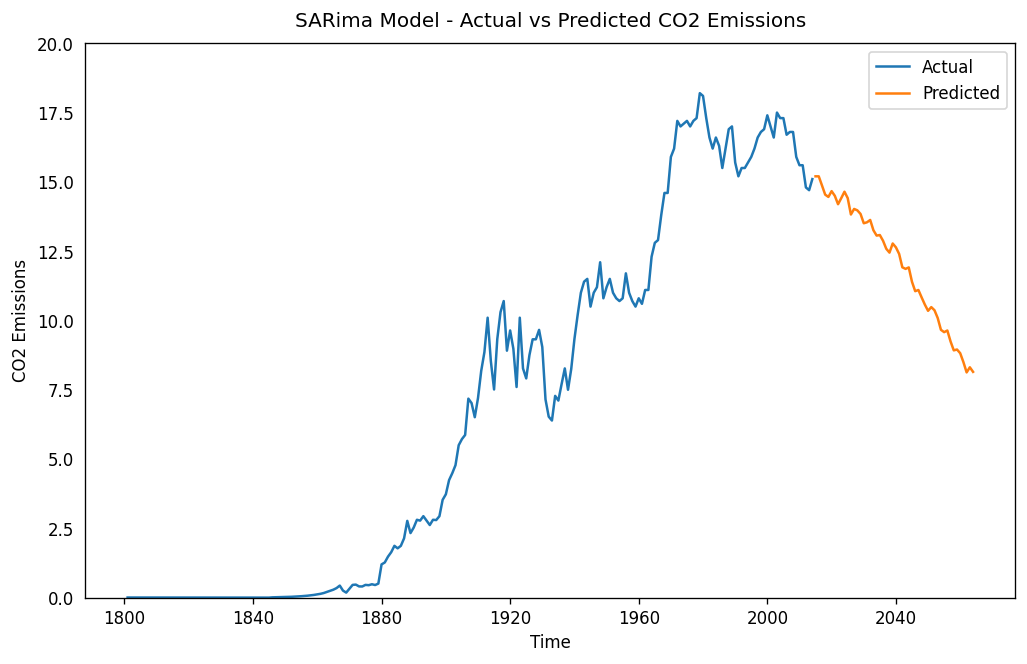

In [122]:

# Plot the actual values and the predicted values
plt.plot(data1.index, data1['CO2'], label='Actual')
plt.plot(predicted_values.index, predicted_values.values, label='Predicted')
plt.xlabel('Time')

plt.ylabel('CO2 Emissions')
plt.title('SARima Model - Actual vs Predicted CO2 Emissions')
plt.legend()
plt.ylim(0,20)
plt.show()


In [123]:
# Calculate evaluation metrics
sar_mae = mean_absolute_error(y_data, sar_y_pred)
sar_mse = mean_squared_error(y_data, sar_y_pred)
sar_rmse = mean_squared_error(y_data, sar_y_pred, squared=False)
sar_r2 = r2_score(y_data, sar_y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", sar_mae)
print("Mean Squared Error (MSE):", sar_mse)
print("Root Mean Squared Error (RMSE):", sar_rmse)
print("R-squared (R2) Score:", sar_r2)

Mean Absolute Error (MAE): 0.366943286744698
Mean Squared Error (MSE): 0.36208701516935965
Root Mean Squared Error (RMSE): 0.6017366659672316
R-squared (R2) Score: -0.20776173722672464


## Exponential Smoothing

In [124]:
model = ExponentialSmoothing(y_data, trend="add", seasonal="add", seasonal_periods=12)
ex_model_fit = model.fit()

C:\Users\Naveen\anaconda3\envs\deepforest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [125]:
ex_predictions = ex_model_fit.predict(start=y_data.index[0], end=y_data.index[-1])


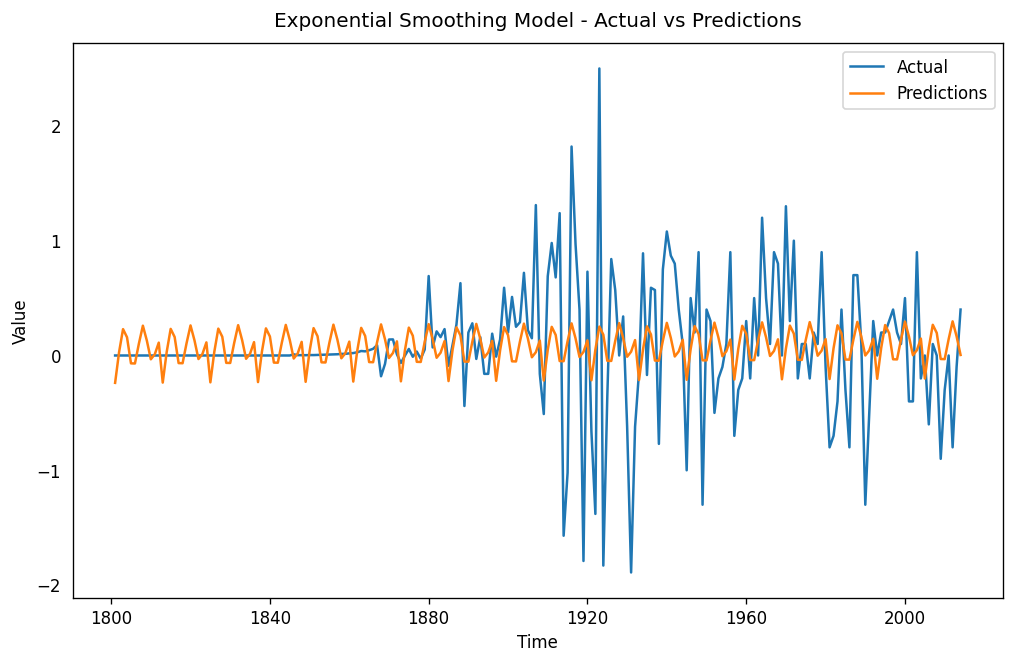

In [126]:
plt.plot(y_data, label='Actual')
plt.plot(ex_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing Model - Actual vs Predictions')
plt.legend()
plt.show()

In [127]:
# Calculate the mean absolute error
ex_mae = mean_absolute_error(y_data, ex_predictions)
# Calculate the R-squared score
ex_r2 = r2_score(y_data, ex_predictions)
# Calculate the root mean squared error
ex_mse = mean_squared_error(y_data, ex_predictions)
ex_rmse=np.sqrt(mean_squared_error(y_data, ex_predictions))

In [128]:
print("Mean Absolute Error", ex_mae)
print("Mean Squared Error", ex_mse)
print("R2 Score",ex_r2)
print("root mean squared error",ex_rmse)

Mean Absolute Error 0.35446595371239104
Mean Squared Error 0.2810782701197013
R2 Score 0.06244751787724412
root mean squared error 0.5301681526833739


In [95]:
#Forecast future values
forecasted_values = ex_model_fit.predict(start=len(y_data), end=len(y_data) + 49)



# Add the differenced values back to obtain the actual predicted values
predicted_values = forecasted_values.cumsum() + data1['CO2'].iloc[-1]
#predicted_values = np.cumsum(forecasted_values) + y_data.iloc[-1]

# Print the predicted valu
print(predicted_values)

2015-01-01    15.148566
2016-01-01    15.298106
2017-01-01    15.099654
2018-01-01    15.168565
2019-01-01    15.438063
2020-01-01    15.636953
2021-01-01    15.608323
2022-01-01    15.578627
2023-01-01    15.723021
2024-01-01    16.022476
2025-01-01    16.191734
2026-01-01    16.198514
2027-01-01    16.249301
2028-01-01    16.401063
2029-01-01    16.204832
2030-01-01    16.275964
2031-01-01    16.547684
2032-01-01    16.748795
2033-01-01    16.722386
2034-01-01    16.694911
2035-01-01    16.841527
2036-01-01    17.143203
2037-01-01    17.314682
2038-01-01    17.323684
2039-01-01    17.376692
2040-01-01    17.530675
2041-01-01    17.336665
2042-01-01    17.410019
2043-01-01    17.683960
2044-01-01    17.887292
2045-01-01    17.863105
2046-01-01    17.837851
2047-01-01    17.986687
2048-01-01    18.290585
2049-01-01    18.464285
2050-01-01    18.475508
2051-01-01    18.530737
2052-01-01    18.686942
2053-01-01    18.495153
2054-01-01    18.570728
2055-01-01    18.846890
2056-01-01    19

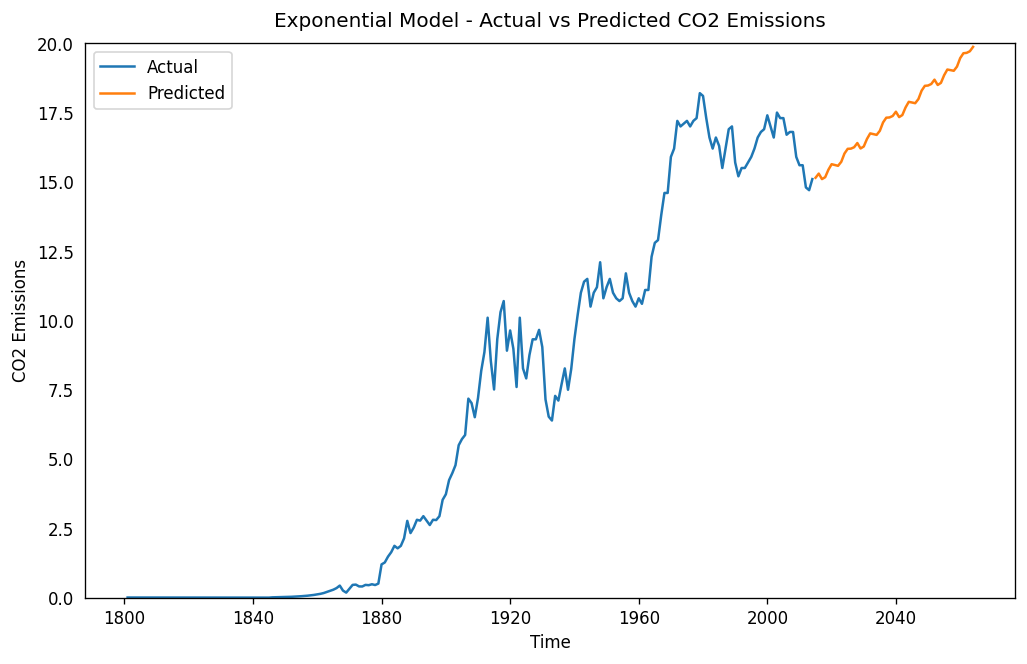

In [96]:

# Plot the actual values and the predicted values
plt.plot(data1.index, data1['CO2'], label='Actual')
plt.plot(predicted_values.index, predicted_values.values, label='Predicted')
plt.xlabel('Time')

plt.ylabel('CO2 Emissions')
plt.title('Exponential Model - Actual vs Predicted CO2 Emissions')
plt.legend()
plt.ylim(0,20)
plt.show()


## CURVE FIT [Gompertz curve]


In [97]:

# Define the curve function
def curve_func(x, a, b, c):
    return a * np.sin(b * x) + c


In [129]:

# Perform curve fitting
popt, pcov = curve_fit(curve_func, np.arange(len(y_data)), y_data)



In [130]:
# Generate the curve fit values
curve_fit_values = curve_func(np.arange(len(y_data)), *popt)


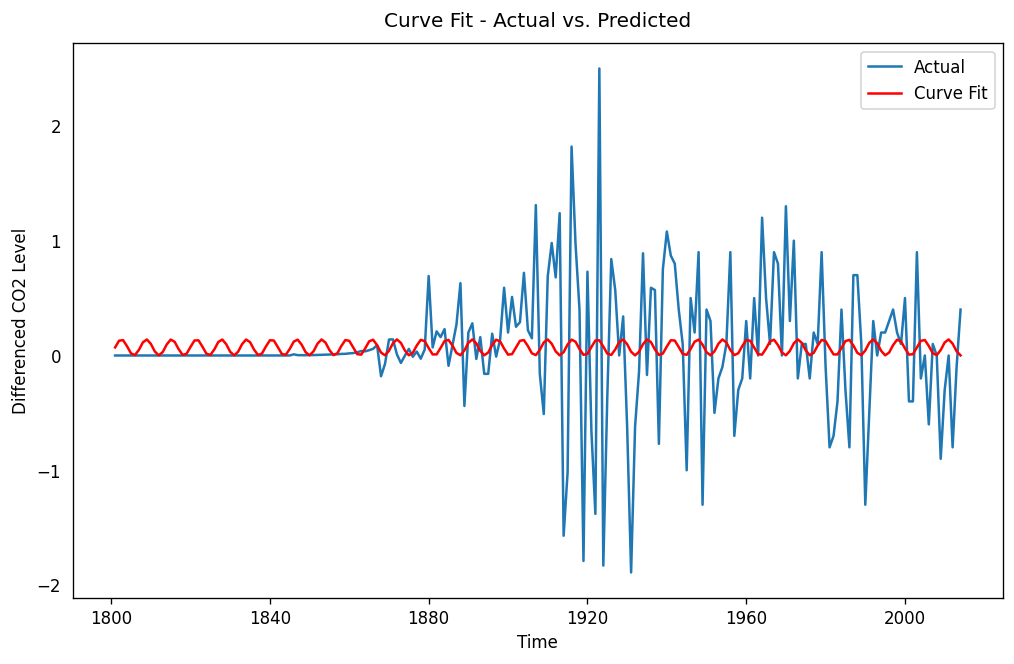

In [131]:

# Plot the actual values and curve fit values
plt.figure(figsize=(10, 6))
plt.plot(y_data.index, y_data, label='Actual')
plt.plot(y_data.index, curve_fit_values, color='red', label='Curve Fit')
plt.xlabel('Time')
plt.ylabel('Differenced CO2 Level')
plt.title('Curve Fit - Actual vs. Predicted')
plt.legend()
plt.show()


In [132]:
#Calculate evaluation metrics
curve_r2 = r2_score(y_data, curve_fit_values)
curve_mse = mean_squared_error(y_data, curve_fit_values)
curve_mae = mean_absolute_error(y_data, curve_fit_values)
curve_rmse=np.sqrt(mean_squared_error(y_data, curve_fit_values))
print("R-squared:", curve_r2)
print("root mean squared error",curve_rmse)
print("Mean Squared Error:", curve_mse)
print("Mean Absolute Error:", curve_mae)

R-squared: 0.008043170329259053
root mean squared error 0.5453335636125802
Mean Squared Error: 0.29738869560239606
Mean Absolute Error: 0.34742455608633277
